# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [176]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [177]:
# Learn the glass data

Data_Set = arff.loadarff(f'datasets/glass_train.arff')
df = pd.DataFrame(Data_Set[0])
le = LabelEncoder()

display(df.head())
display(df["Type"].value_counts())


df['Type'] = le.fit_transform(df['Type'])


# df = df.replace({
#     b'n': 'no',
#     b'y': 'yes',
#     b'?': 'unknown',
#     b'republican': 'republican',
#     b'democrat': 'democrat'
# }).astype(str)

display(df.head())

X = pd.get_dummies(df.drop('Type', axis=1)).to_numpy()
y = df['Type'].to_numpy()

X_voting = X
y_voting = y

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


,RI,Na,Mg,Al,Si,'K',Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,b'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,b'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,b'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,b'tableware'
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,b'build wind non-float'


Type
b'build wind non-float'    44
b'build wind float'        41
b'headlamps'               18
b'vehic wind float'        12
b'containers'               7
b'tableware'                5
Name: count, dtype: int64

,RI,Na,Mg,Al,Si,'K',Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,0
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,5
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,0
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,4
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,1


In [178]:
def run_stuff(test_size=0.2, p=2):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  clf = KNeighborsClassifier(p=p)

  clf.fit(x_train, y_train)
  clf.score(x_test, y_test)
  print("----------------------------------------------------------")
  print(f"Test Size: {test_size * 100}% Train Size: {(1 - test_size) * 100}% P Value: {p}")
  print(f"Train score: {clf.score(x_train, y_train)}")
  print(f"Test score: {clf.score(x_test, y_test)}")


run_stuff(0.1)
run_stuff(0.2)
run_stuff(0.3)
run_stuff(0.4)
run_stuff(0.5)
run_stuff(0.6)
run_stuff(0.7)
run_stuff(0.8)
run_stuff(0.9)

run_stuff()
run_stuff(p=1)
run_stuff(p=2)
run_stuff(p=3)
run_stuff(p=4)



----------------------------------------------------------
Test Size: 10.0% Train Size: 90.0% P Value: 2
Train score: 0.6578947368421053
Test score: 0.7692307692307693
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% P Value: 2
Train score: 0.6732673267326733
Test score: 0.46153846153846156
----------------------------------------------------------
Test Size: 30.0% Train Size: 70.0% P Value: 2
Train score: 0.6818181818181818
Test score: 0.6153846153846154
----------------------------------------------------------
Test Size: 40.0% Train Size: 60.0% P Value: 2
Train score: 0.7105263157894737
Test score: 0.49019607843137253
----------------------------------------------------------
Test Size: 50.0% Train Size: 50.0% P Value: 2
Train score: 0.6507936507936508
Test score: 0.59375
----------------------------------------------------------
Test Size: 60.0% Train Size: 40.0% P Value: 2
Train score: 0.64
Test score: 0.5714285714285714
---------------

#### Test/Train Split Analysis (P=2)

|Test Size|Train Size|P Value|Train Score|Test Score|
|---|---|---|---|---|
|10.0%|90.0%|2|0.7982|0.6154|
|20.0%|80.0%|2|0.7525|0.6923|
|30.0%|70.0%|2|0.7614|0.5897|
|40.0%|60.0%|2|0.7105|0.6275|
|50.0%|50.0%|2|0.7778|0.5781|
|60.0%|40.0%|2|0.7600|0.5714|
|70.0%|30.0%|2|0.7632|0.5281|
|80.0%|20.0%|2|0.8400|0.5294|
|90.0%|10.0%|2|0.5833|0.3478|
|20.0%|80.0%|2|0.7327|0.5769|

#### P Value Comparison (20% Test / 80% Train)

|Test Size|Train Size|P Value|Train Score|Test Score|
|---|---|---|---|---|
|20.0%|80.0%|2|0.7327|0.5769|
|20.0%|80.0%|1|0.8119|0.4615|
|20.0%|80.0%|2|0.7129|0.6538|
|20.0%|80.0%|3|0.8119|0.6154|
|20.0%|80.0%|4|0.8020|0.5000|


#### Discussion
What were your accuracies or output probabilities and how did different hyperparameter values affect the outcome? Discuss the differences you see.

** Your discussion goes here **

The best test score that I achived was 69% accuracy. This does not seem like a super large ammount, and that was with the default hyperparameters. With different hyperparameters, the test accuracy just went down. For instance, as the p value went up or down from the initial value of 2, the lower the accuracy went. Aditionally, the best test accuracy came from using a test train split of 80:20, and every other attempted split achived increasingly lower scores as the 2 values moved away from that 80:20 split.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [179]:
# Learn magic telescope data

Data_Set = arff.loadarff(f'datasets/magic_telescope_train.arff')
df = pd.DataFrame(Data_Set[0])
le = LabelEncoder()

display(df.head())
display(df["class"].value_counts())


df['class'] = le.fit_transform(df['class'])


# df = df.replace({
#     b'n': 'no',
#     b'y': 'yes',
#     b'?': 'unknown',
#     b'republican': 'republican',
#     b'democrat': 'democrat'
# }).astype(str)

display(df.head())

X = pd.get_dummies(df.drop('class', axis=1)).to_numpy()
y = df['class'].to_numpy()

X_voting = X
y_voting = y

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,22.7815,14.9526,2.4362,0.4982,0.2509,-14.2836,-9.3635,13.0939,3.0779,141.5620,b'g'
1,40.6756,15.5940,2.7447,0.2772,0.1449,19.6226,9.0297,7.4157,15.4260,193.2340,b'g'
2,12.8427,11.3821,2.1255,0.7191,0.4232,-14.9637,8.5891,6.9418,82.4198,183.9790,b'g'
3,77.0262,32.2880,3.3502,0.3152,0.1868,-28.6712,-35.9464,-31.4001,0.8940,357.0440,b'g'
4,27.5146,11.2114,2.6637,0.4643,0.2687,42.4467,33.0422,-6.3980,50.3004,239.8878,b'h'


class
b'g'    7971
b'h'    4383
Name: count, dtype: int64

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,22.7815,14.9526,2.4362,0.4982,0.2509,-14.2836,-9.3635,13.0939,3.0779,141.5620,0
1,40.6756,15.5940,2.7447,0.2772,0.1449,19.6226,9.0297,7.4157,15.4260,193.2340,0
2,12.8427,11.3821,2.1255,0.7191,0.4232,-14.9637,8.5891,6.9418,82.4198,183.9790,0
3,77.0262,32.2880,3.3502,0.3152,0.1868,-28.6712,-35.9464,-31.4001,0.8940,357.0440,0
4,27.5146,11.2114,2.6637,0.4643,0.2687,42.4467,33.0422,-6.3980,50.3004,239.8878,1


In [180]:
def run_stuff(X=X, y=y, test_size=0.2, n_neighbors=3, weights='uniform'):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

  clf.fit(x_train, y_train)
  clf.score(x_test, y_test)
  print("----------------------------------------------------------")
  print(f"Test Size: {test_size * 100}% Train Size: {(1 - test_size) * 100}% Neighbor Count: {n_neighbors}")
  print(f"Train score: {clf.score(x_train, y_train)}")
  print(f"Test score: {clf.score(x_test, y_test)}")

run_stuff()

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Train score: 0.8787817464332692
Test score: 0.7936058276001619


#### Discussion
What did you observe in your results?

** Your discussion goes here **

It looks like with k=3, no distance weighting and without normalization, the KNN classifier was able to consistantly get about a 75-80% accuracy on the test set.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [181]:
# Train/Predict with normalization

scaler = MinMaxScaler()

scaler.fit(X)

X_norm = scaler.transform(X)

run_stuff(X_norm, y)

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Train score: 0.8963877365172519
Test score: 0.821125050586807


#### Discussion
Discuss the results of using normalized data vs. unnormalized data

** Your discussion goes here **

It seems as though the results with normalized data are better than without normalization. It appears that with normalized data, the results were also much more consistant, standardizing at about 80-83% for the test accuracy. This is also higher than the 75-80% accuracy without normalization.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [182]:
#Train/Precdict with normalization and distance weighting

run_stuff(X_norm, y, weights="distance")

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Train score: 1.0
Test score: 0.8142452448401457


#### Discussion
Comparison and discuss the differences you see with distance weighting and normalization vs without.

** Your discussion goes here **

From my testing, the adition of distance weighting to the KNN classifier along with the previous normalization weighting, the test accuracy remained about the same, but the precision increased even more than last time, with almost all output values for the test score clustering around 81-83%. This is quite a bit higher and more consistant compared to the test without distance weighting or normalization.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

In [183]:
# Calculate and Graph classification accuracy vs k values

for i in range(1, 15):
  run_stuff(X_norm, y, weights="distance", n_neighbors=i)

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 1
Train score: 1.0
Test score: 0.8061513557264266
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 2
Train score: 1.0
Test score: 0.8178874949413193
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Train score: 1.0
Test score: 0.8186968838526912
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 4
Train score: 1.0
Test score: 0.8271954674220963
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 5
Train score: 1.0
Test score: 0.8348846620801295
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 6
Train score: 1.0
Test score: 0.8304330230675839
----------------------------------------


|Test Size|Train Size|Neighbor Count (k)|Train Score|Test Score|
|---|---|---|---|---|
|20.0%|80.0%|1|1.0000|0.7997|
|20.0%|80.0%|2|1.0000|0.7989|
|20.0%|80.0%|3|1.0000|0.8264|
|20.0%|80.0%|4|1.0000|0.8207|
|20.0%|80.0%|5|1.0000|0.8304|
|20.0%|80.0%|6|1.0000|0.8337|
|20.0%|80.0%|7|1.0000|0.8345|
|20.0%|80.0%|8|1.0000|0.8365|
|20.0%|80.0%|9|1.0000|0.8316|
|20.0%|80.0%|10|1.0000|0.8345|
|20.0%|80.0%|11|1.0000|0.8300|
|20.0%|80.0%|12|1.0000|0.8337|
|20.0%|80.0%|13|1.0000|0.8333|
|20.0%|80.0%|14|1.0000|0.8410|


#### Discussion
How do the k values affect your results?

** Your discussion goes here **

It appears that although the training score was always perfect, the model did learn to generelize pretty well, and the test scores reflected that. It appears that as k increases, the accuracy also increases, but with deminishing returns around k=6.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

#### Discussion
Discuss the innapropriate feature. Which one and why?

** Your discussion goes here **

I believe the feature that is supposed to be inappropriate is column B, or the number of blacks that live in the surrounding neighborhood. This is because it is a politically charged feature in this current world of equality. I however do not believe that this feature is unimportant, in fact, having a value for every race seems like it would be a truely useful way to accurately predict a house's value. 

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [184]:
Data_Set = arff.loadarff(f'datasets/housing_train.arff')
df = pd.DataFrame(Data_Set[0])

display(df.head())

X = pd.get_dummies(df.drop('MEDV', axis=1)).to_numpy()
y = df['MEDV'].to_numpy()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,b'0',0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,b'0',0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,b'0',0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,b'0',0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,b'0',0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [185]:
# Learn and experiment with housing price prediction data

def run_stuff(X=X, y=y, test_size=0.2, n_neighbors=3, weights='uniform'):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  clf = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

  clf.fit(x_train, y_train)
  clf.score(x_test, y_test)
  
  y_pred = clf.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  
  
  print("----------------------------------------------------------")
  print(f"Test Size: {test_size * 100}% Train Size: {(1 - test_size) * 100}% Neighbor Count: {n_neighbors}")
  print(f"Mean Absolute Error: {mae}")
  print(f"Train score: {clf.score(x_train, y_train)}")
  print(f"Test score: {clf.score(x_test, y_test)}")
  return [mae]

scaler = MinMaxScaler()

scaler.fit(X)

X_norm = scaler.transform(X)


print("No input normalization and no distance weighting")
run_stuff(X, y)
print('')

print("Normalization and no distance weighting")
run_stuff(X_norm, y)
print('')

print("Normalization and distance weighting")
run_stuff(X_norm, y, weights="distance")
print('')


No input normalization and no distance weighting
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Mean Absolute Error: 5.034798534798535
Train score: 0.8516097529247417
Test score: 0.16238443993421436

Normalization and no distance weighting
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Mean Absolute Error: 2.2333333333333334
Train score: 0.8913037445402486
Test score: 0.8205758257590572

Normalization and distance weighting
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Mean Absolute Error: 2.94594200189835
Train score: 1.0
Test score: 0.8109293511981589



#### KNN Configuration Comparison (k=3, 20% Test / 80% Train)

|Configuration|Normalization|Distance Weighting|Mean Absolute Error|Train Score|Test Score|
|---|---|---|---|---|---|
|Baseline|❌ No|❌ No|4.5150|0.7938|0.4895|
|Normalized|✅ Yes|❌ No|2.3747|0.8836|0.8607|
|Normalized + Weighted|✅ Yes|✅ Yes|2.4204|1.0000|0.8608|


#### Discussion
Discuss your results. How did the hyperparameters affect your results? Discuss each one and combinations of each.

** Your discussion goes here **

It appears that distance weighting did not really have much of an effect in this analysis, but normilizaiton made an extremely large difference. With and without normilization, the test score went from less than 50% accuracy to over 85%! And the MAE got almost cut in half. It must be something about the dataset that benifits greatly from being normilized.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 1
Mean Absolute Error: 2.7032967032967035
Train score: 1.0
Test score: 0.8207535962326669
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 2
Mean Absolute Error: 2.7408974865903066
Train score: 1.0
Test score: 0.8490692259937302
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Mean Absolute Error: 3.108923913450636
Train score: 1.0
Test score: 0.782153932198989
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 4
Mean Absolute Error: 2.8723115097891867
Train score: 1.0
Test score: 0.8126906896992566
----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 5
Mean Absolute Error: 2.9848580136444323
Train score: 1.0
Test score: 0.7744082637036391
--

[2.7032967032967035,
 2.7408974865903066,
 3.108923913450636,
 2.8723115097891867,
 2.9848580136444323,
 3.0498650023817846,
 3.7665822422428814,
 3.905793223670396,
 3.081327327169017,
 3.4858374688619223,
 3.123835409668857,
 3.2760206149071127,
 3.1490859167819347,
 3.6951250613982256,
 2.830667788890303]

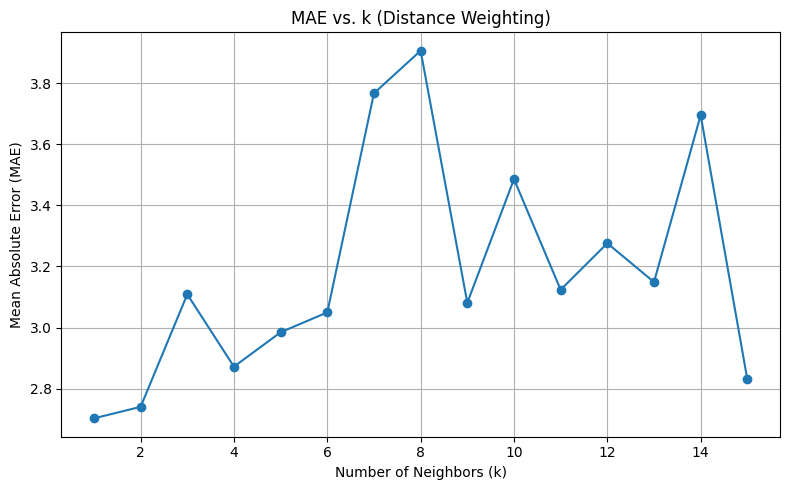

In [187]:
# Learn and graph for different k values

maes = []

# k values that correspond to the MAE list (1 – 15 inclusive)
k_values = list(range(1, 16))

for i in k_values:
  maes.append(run_stuff(X_norm, y, weights="distance", n_neighbors=i)[0])

display(maes)



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, maes, marker='o', linestyle='-')
plt.title('MAE vs. k (Distance Weighting)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Discussion
How did the k values affect your results for this dataset? How does that compare to your previous work in this lab?

** Your discussion goes here **

It appears that in this case, as k increases, the MAE generally increases (which is a bad thing). So a lower number of neighbors is better for this dataset. This is different from the previous dataset, where we saw that a higher number of neighbors resulted in a higher benchmark score.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [190]:
# Train/Predict lymph with your own distance metric

df = pd.read_csv("datasets/lymph.csv", delimiter=",")

display(df.head())

X = pd.get_dummies(df.drop('selector', axis=1)).to_numpy()
y = df['selector'].to_numpy()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [ ]:
test_size = 0.2
n_neighbors = 3
weights = "uniform"

def mydist(x: np.ndarray, y: np.ndarray):
	if (0 not in x and 1 not in x):
		return x[0]
	
	return np.sqrt(x.sum() + y.sum())


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=mydist)

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

y_pred = clf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)


print("----------------------------------------------------------")
print(f"Test Size: {test_size * 100}% Train Size: {(1 - test_size) * 100}% Neighbor Count: {n_neighbors}")
print(f"Mean Absolute Error: {mae}")
print(f"Train score: {clf.score(x_train, y_train)}")
print(f"Test score: {clf.score(x_test, y_test)}")

----------------------------------------------------------
Test Size: 20.0% Train Size: 80.0% Neighbor Count: 3
Mean Absolute Error: 0.37681159420289856
Train score: 0.5688405797101449
Test score: 0.6231884057971014


#### Discussion
Explain your distance metric and discuss your results

** Your discussion goes here **

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

*Discussion*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        return 0